# Wine Quality Prediction using Machine Learning

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "+"*70)
print("STEP 1: LOAD DATASET")
print("+"*70)
# Load dataset
df = pd.read_csv('processed_winequality.csv')
df.head()


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 1: LOAD DATASET
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [39]:
# Basic exploration
print("\n" + "+"*70)
print("STEP 2: ANALYSIS")
print("+"*70)
print(df.shape)  
print(df.info())
print(df.describe())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 2: ANALYSIS
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(6497, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: 

#### Check for missing values

In [40]:
print("NULL CHECK")
print("-"*70)
print(df.isnull().sum())  

NULL CHECK
----------------------------------------------------------------------
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### Check for duplicates

In [41]:
print("DUPLICATE CHECK")
print("-"*70)
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"{duplicates} duplicate rows found")
else:
    print("No duplicates found.")

DUPLICATE CHECK
----------------------------------------------------------------------
1179 duplicate rows found


In [42]:
print("TARGET VARIABLE DISTRIBUTION ANALYSIS")
print("-"*70)
print("\nQuality Score Distribution:")
quality_distribution = df['quality'].value_counts().sort_index()
print(quality_distribution)

TARGET VARIABLE DISTRIBUTION ANALYSIS
----------------------------------------------------------------------

Quality Score Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


### Quality Distribution Bar Chart


######################################################################
VISUALIZATION 1: QUALITY DISTRIBUTION BAR CHART
######################################################################


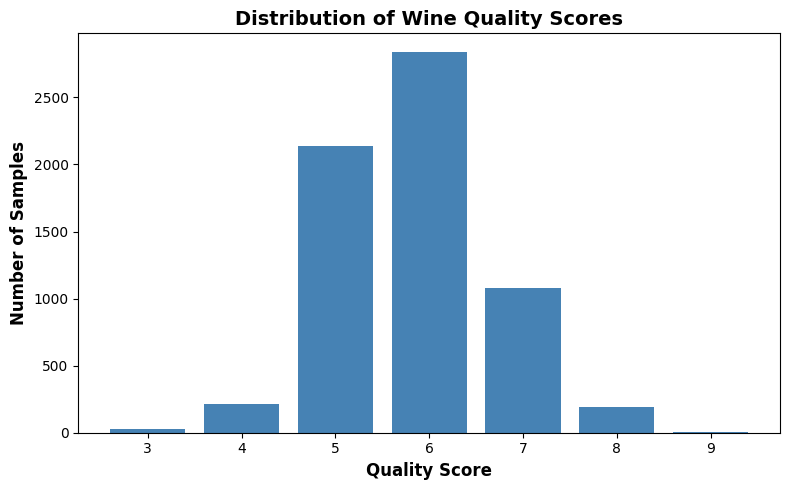

In [43]:
print("\n" + "#"*70)
print("VISUALIZATION 1: QUALITY DISTRIBUTION BAR CHART")
print("#"*70)

plt.figure(figsize=(8, 5))
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values, color='steelblue')

plt.xlabel('Quality Score', fontsize=12, fontweight='bold')
plt.ylabel('Number of Samples', fontsize=12, fontweight='bold')
plt.title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Correlation Heatmap


######################################################################
VISUALIZATION 2: CORRELATION HEATMAP
######################################################################


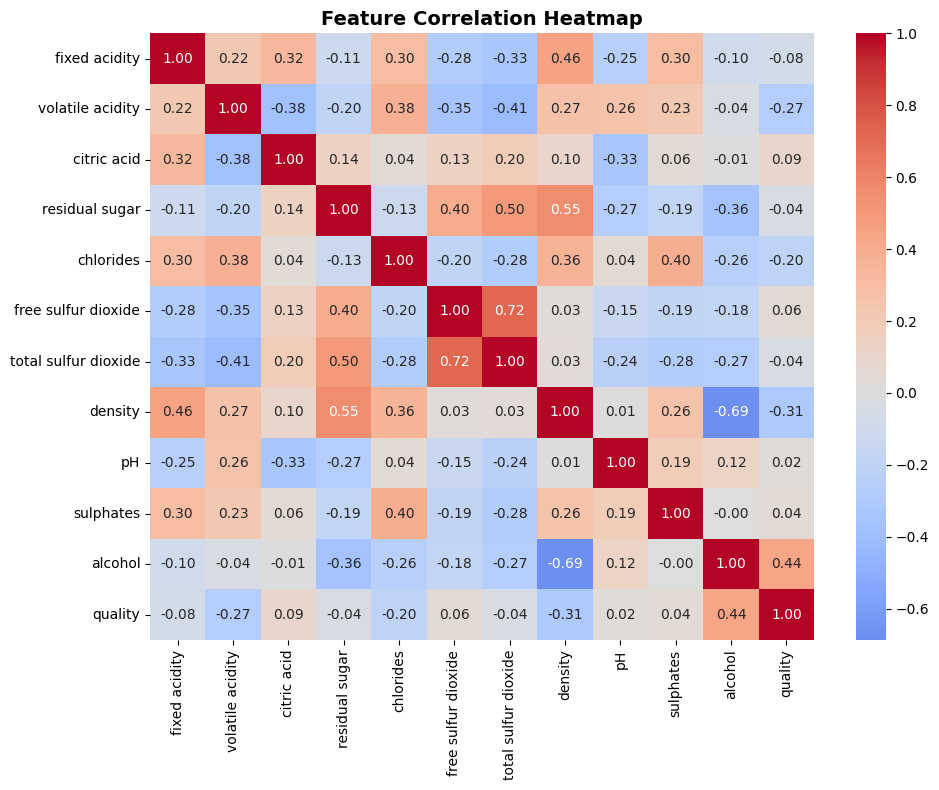


Top 5 Features Correlated with Quality:
1. alcohol: 0.444
2. citric acid: 0.086
3. free sulfur dioxide: 0.055
4. sulphates: 0.038
5. pH: 0.020


In [44]:
print("\n" + "#"*70)
print("VISUALIZATION 2: CORRELATION HEATMAP")
print("#"*70)

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 5 Features Correlated with Quality:")
quality_corr = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)
for i, (feature, corr) in enumerate(quality_corr.head(5).items(), 1):
    print(f"{i}. {feature}: {corr:.3f}")

### Feature Distribution Histogram


######################################################################
VISUALIZATION 3: FEATURE DISTRIBUTION HISTOGRAMS
######################################################################


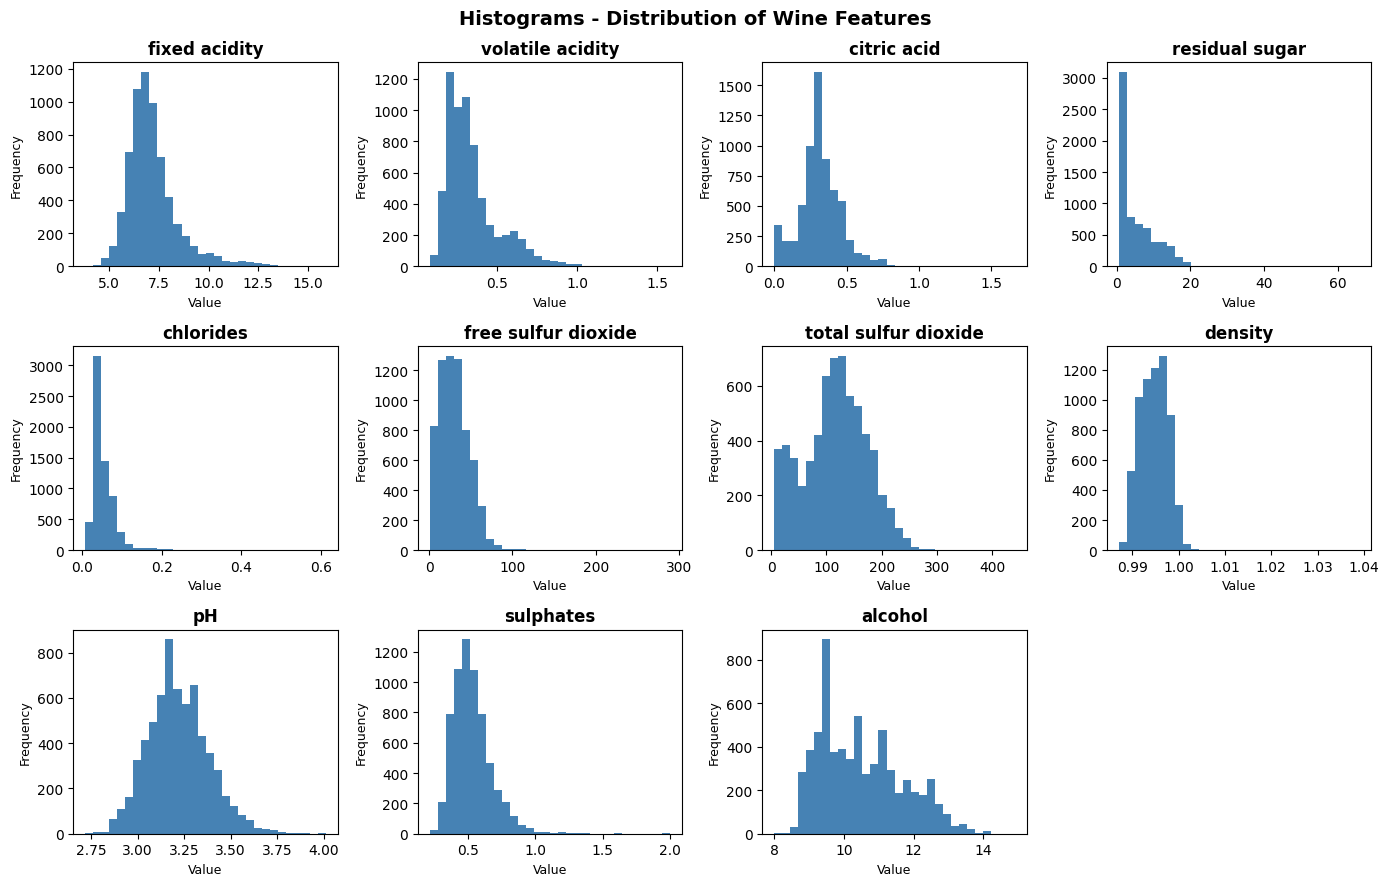

In [45]:
print("\n" + "#"*70)
print("VISUALIZATION 3: FEATURE DISTRIBUTION HISTOGRAMS")
print("#"*70)

numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('quality')

fig, axes = plt.subplots(3, 4, figsize=(14, 9))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='steelblue')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)

# Hide empty subplot
axes[-1].axis('off')

fig.suptitle('Histograms - Distribution of Wine Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Outlier Detection Boxplot


######################################################################
VISUALIZATION 4: BOXPLOTS FOR OUTLIER DETECTION
######################################################################


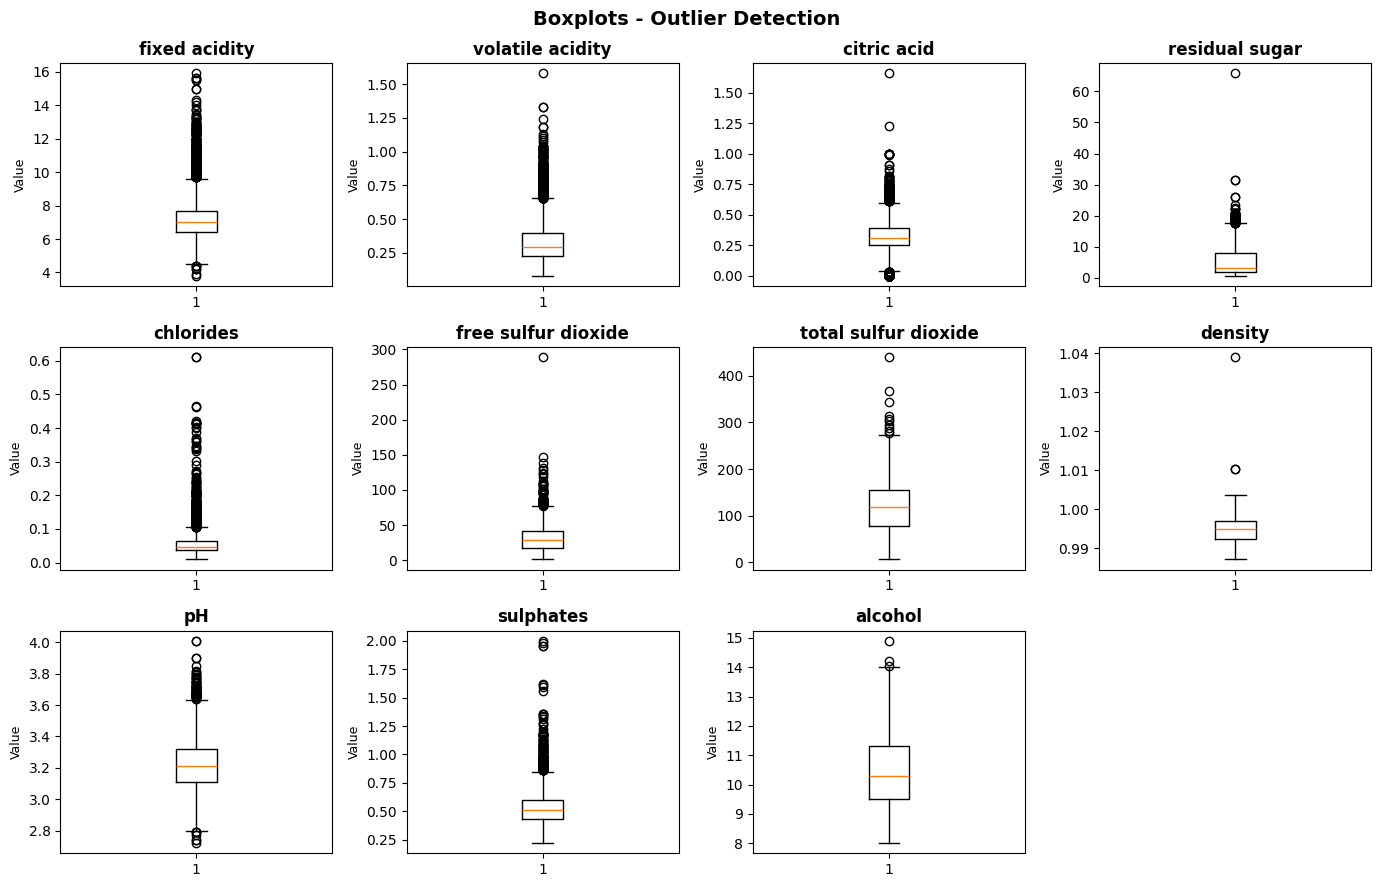

In [46]:
print("\n" + "#"*70)
print("VISUALIZATION 4: BOXPLOTS FOR OUTLIER DETECTION")
print("#"*70)

fig, axes = plt.subplots(3, 4, figsize=(14, 9))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)

# Hide empty subplot
axes[-1].axis('off')

fig.suptitle('Boxplots - Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Feature - Quality Relation Scatter Plots


######################################################################
VISUALIZATION 5: SCATTER PLOTS - FEATURE-QUALITY RELATIONSHIPS
######################################################################


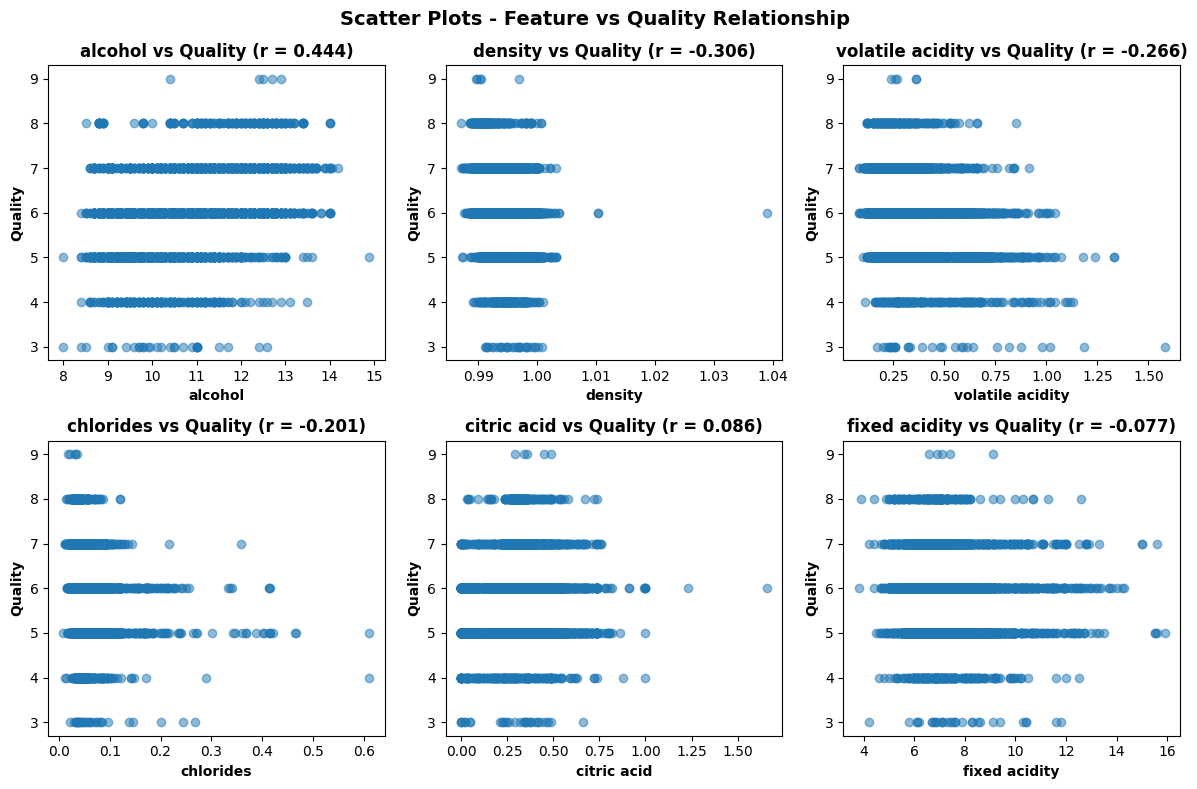

In [47]:
print("\n" + "#"*70)
print("VISUALIZATION 5: SCATTER PLOTS - FEATURE-QUALITY RELATIONSHIPS")
print("#"*70)
# Selects top 6 features most correlated with quality for visualization
quality_corr_abs = correlation_matrix['quality'].drop('quality').abs().sort_values(ascending=False)
top_features = quality_corr_abs.head(6).index

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df['quality'], alpha=0.5)
    
    # Calculates Pearson correlation coefficient
    corr = df[feature].corr(df['quality'])
    axes[idx].set_xlabel(feature, fontweight='bold')
    axes[idx].set_ylabel('Quality', fontweight='bold')
    axes[idx].set_title(f'{feature} vs Quality (r = {corr:.3f})', fontweight='bold')

fig.suptitle('Scatter Plots - Feature vs Quality Relationship', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [48]:
print("\n" + "+"*70)
print("STEP 3: DATA PREPROCESSING")
print("+"*70)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Gentle (3.0) Outlier detection using IQR method
def remove_outliers(data, columns, iqr_multiplier=3.0):
    data_clean = data.copy()
    outliers_removed = 0
    
    for col in columns:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        
        before = len(data_clean)
        data_clean = data_clean[(data_clean[col] >= lower_bound) & 
                                (data_clean[col] <= upper_bound)]
        outliers_removed += (before - len(data_clean))
    
    return data_clean, outliers_removed

# Apply outlier removal
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('quality')
df_clean, outliers_count = remove_outliers(df, numeric_cols, iqr_multiplier=3.0)

print(f"Original dataset size: {df.shape[0]} samples")
print(f"After outlier removal: {df_clean.shape[0]} samples")

# Separate features and target
X = df_clean.drop('quality', axis=1)
y = df_clean['quality']

print("\n" + "+"*70)
print("STEP 4: TRAIN - TEST SPLITTING")
print("+"*70)
# Train-test split (80-20 with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

from sklearn.preprocessing import RobustScaler
# RobustScaler uses median and IQR instead of mean and std
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 3: DATA PREPROCESSING
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Original dataset size: 6497 samples
After outlier removal: 6185 samples

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 4: TRAIN - TEST SPLITTING
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Training set: 4948 samples
Testing set: 1237 samples


### Random Forest Model Implementation

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=100,          
    max_depth=10,              
    min_samples_split=20,      
    min_samples_leaf=10,       
    max_features='sqrt',       
    random_state=42,           
    n_jobs=-1,                 
    verbose=0
)

# Train model
print("\n" + "+"*70)
print("STEP 5: RANDOM FOREST MODEL")
print("+"*70)
print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 5: RANDOM FOREST MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Training Random Forest...


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=20, n_jobs=-1, random_state=42)

In [50]:
# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
# Evaluation
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
gap_rf = abs(train_rmse_rf - test_rmse_rf)

In [51]:
print("Random Forest Results")
print("-"*70)
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Testing RMSE: {test_rmse_rf:.4f}")
print(f"Training R² Score: {train_r2_rf:.4f}")
print(f"Testing R² Score: {test_r2_rf:.4f}")
print(f"Testing MAE: {test_mae_rf:.4f}")
print(f"Train-Test Gap: {gap_rf:.4f}")

Random Forest Results
----------------------------------------------------------------------
Training RMSE: 0.5807
Testing RMSE: 0.6524
Training R² Score: 0.5510
Testing R² Score: 0.4307
Testing MAE: 0.5072
Train-Test Gap: 0.0717


In [52]:
# Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("Top 5 Important Features of Random Forest")
print("-"*70)
print(feature_importance_rf.head())


Top 5 Important Features of Random Forest
----------------------------------------------------------------------
                feature  importance
10              alcohol    0.272155
7               density    0.133166
1      volatile acidity    0.120408
5   free sulfur dioxide    0.082282
4             chlorides    0.077264


### Gradient Boosting Model Implementation

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gb_model = GradientBoostingRegressor(
    n_estimators=100,          # Number of boosting stages
    learning_rate=0.05,        
    max_depth=4,               
    min_samples_split=20,      
    min_samples_leaf=10,       
    subsample=0.7,             
    max_features='sqrt',       
    loss='squared_error',      
    random_state=42,
    verbose=0
)

# Train model
print("\n" + "+"*70)
print("STEP 6: GRADIENT BOOSTING MODEL")
print("+"*70)
print("\nTraining Gradient Boosting...")
gb_model.fit(X_train_scaled, y_train)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 6: GRADIENT BOOSTING MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Training Gradient Boosting...


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          min_samples_leaf=10, min_samples_split=20,
                          random_state=42, subsample=0.7)

In [54]:
# Predictions
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
gap_gb = abs(train_rmse_gb - test_rmse_gb)

In [55]:
print("Gradient Boosting Results")
print("-"*70)
print(f"Training RMSE: {train_rmse_gb:.4f}")
print(f"Testing RMSE: {test_rmse_gb:.4f}")
print(f"Training R² Score: {train_r2_gb:.4f}")
print(f"Testing R² Score: {test_r2_gb:.4f}")
print(f"Testing MAE: {test_mae_gb:.4f}")
print(f"Train-Test Gap: {gap_gb:.4f} ")

Gradient Boosting Results
----------------------------------------------------------------------
Training RMSE: 0.6335
Testing RMSE: 0.6709
Training R² Score: 0.4657
Testing R² Score: 0.3981
Testing MAE: 0.5240
Train-Test Gap: 0.0374 


### Learning Curves for Gradient Boosting


######################################################################
VISUALIZATION 6: GRADIENT BOOSTING LEARNING CURVES
######################################################################


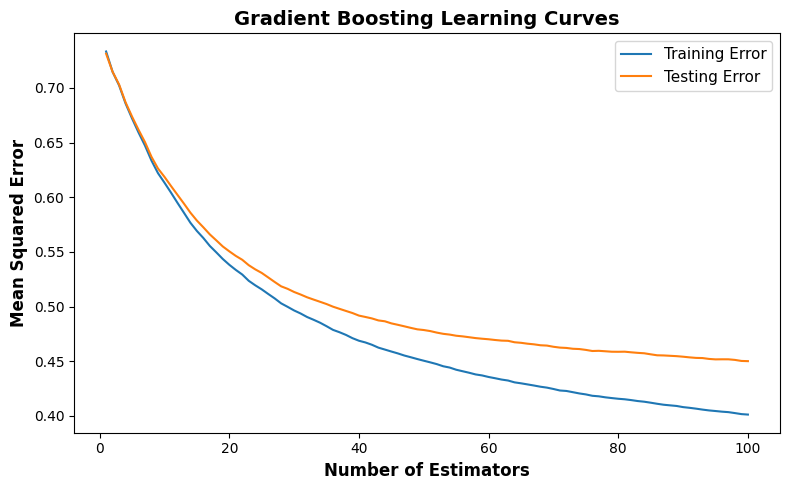

In [56]:
print("\n" + "#"*70)
print("VISUALIZATION 6: GRADIENT BOOSTING LEARNING CURVES")
print("#"*70)
train_scores = []
test_scores = []

# Use staged_predict which returns a generator for all stages
for train_pred, test_pred in zip(gb_model.staged_predict(X_train_scaled), 
                                  gb_model.staged_predict(X_test_scaled)):
    train_scores.append(mean_squared_error(y_train, train_pred))
    test_scores.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_scores) + 1), train_scores, label='Training Error')
plt.plot(range(1, len(test_scores) + 1), test_scores, label='Testing Error')
plt.xlabel('Number of Estimators', fontsize=12, fontweight='bold')
plt.ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
plt.title('Gradient Boosting Learning Curves', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

### XGBoost Model Implementation

In [57]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("\n" + "+"*70)
print("STEP 7: XGBOOST MODEL")
print("+"*70)
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],          # L1 regularization
    'reg_lambda': [1, 1.5, 2]          # L2 regularization
}

# Initialize GridSearchCV
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# GridSearchCV performs 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimization metric
    cv=5,                              # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 7: XGBOOST MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [58]:
# Perform hyperparameter tuning
print("\n" + "+"*70)
print("STEP 8: HYPERPARAMETER TUNING FOR XGBOOST")
print("+"*70)
print("Performing hyperparameter tuning for XGBoost...")
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.4f}")


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 8: HYPERPARAMETER TUNING FOR XGBOOST
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Performing hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.8}
Best CV RMSE: 0.6168


In [59]:
# Train model with best parameters
xgb_final = xgb.XGBRegressor(
    **grid_search.best_params_,
    objective='reg:squarederror',
    eval_metric='rmse',  
    random_state=42,
    early_stopping_rounds=10  
)

# Fit the model with evaluation set
xgb_final.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=False
)

# Predictions
y_train_pred_xgb = xgb_final.predict(X_train_scaled)
y_test_pred_xgb = xgb_final.predict(X_test_scaled)

# Evaluation
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
gap_xgb = abs(train_rmse_xgb - test_rmse_xgb)

In [60]:
print("XGBOOST MODEL PERFORMANCE")
print("-"*70)
print(f"Training RMSE: {train_rmse_xgb:.4f}")
print(f"Testing RMSE: {test_rmse_xgb:.4f}")
print(f"Training R² Score: {train_r2_xgb:.4f}")
print(f"Testing R² Score: {test_r2_xgb:.4f}")
print(f"Testing MAE: {test_mae_xgb:.4f}")
print(f"Train-Test Gap: {gap_xgb:.4f}")

XGBOOST MODEL PERFORMANCE
----------------------------------------------------------------------
Training RMSE: 0.3131
Testing RMSE: 0.5998
Training R² Score: 0.8695
Testing R² Score: 0.5190
Testing MAE: 0.4375
Train-Test Gap: 0.2866


In [61]:
print("\n" + "+"*70)
print("STEP 9: MODEL EVALUATION AND COMPARISON")
print("+"*70)
# Prepare comparison data using individual variables
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
test_rmse_values = [test_rmse_rf, test_rmse_gb, test_rmse_xgb]
test_r2_values = [test_r2_rf, test_r2_gb, test_r2_xgb]
test_mae_values = [test_mae_rf, test_mae_gb, test_mae_xgb]
gaps = [gap_rf, gap_gb, gap_xgb]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Test RMSE': test_rmse_values,
    'Test R² Score': test_r2_values,
    'Test MAE': test_mae_values,
    'Train-Test Gap': gaps
}, index=models)

print("\nModel Performance Comparison Table:")
print(comparison_df.to_string())



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 9: MODEL EVALUATION AND COMPARISON
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Model Performance Comparison Table:
                   Test RMSE  Test R² Score  Test MAE  Train-Test Gap
Random Forest       0.652450       0.430717  0.507249        0.071734
Gradient Boosting   0.670905       0.398056  0.524011        0.037443
XGBoost             0.599753       0.518962  0.437534        0.286643


### Model Comparision Bar Chart


######################################################################
VISUALIZATION 7: MODEL COMPARISION CHART
######################################################################


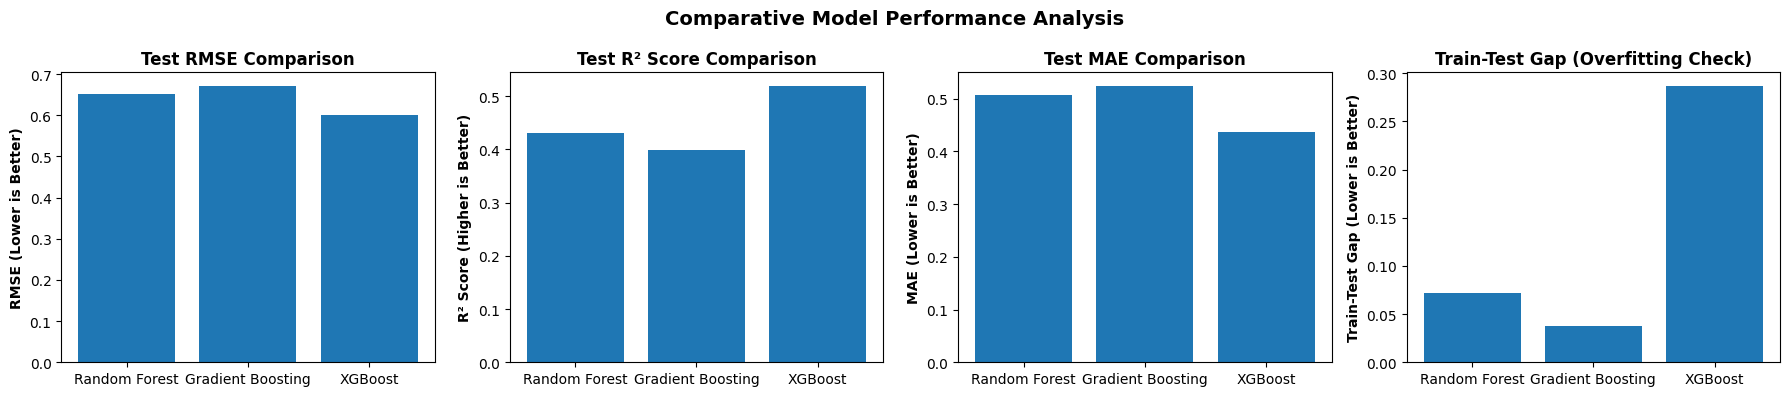

In [62]:
print("\n" + "#"*70)
print("VISUALIZATION 7: MODEL COMPARISION CHART")
print("#"*70)
# Create subplots for comparison
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Test RMSE Comparison
axes[0].bar(models, test_rmse_values)
axes[0].set_ylabel('RMSE (Lower is Better)', fontweight='bold')
axes[0].set_title('Test RMSE Comparison', fontweight='bold')

# Test R² Comparison
axes[1].bar(models, test_r2_values)
axes[1].set_ylabel('R² Score (Higher is Better)', fontweight='bold')
axes[1].set_title('Test R² Score Comparison', fontweight='bold')

# Test MAE Comparison
axes[2].bar(models, test_mae_values)
axes[2].set_ylabel('MAE (Lower is Better)', fontweight='bold')
axes[2].set_title('Test MAE Comparison', fontweight='bold')

# Train-Test Gap
axes[3].bar(models, gaps)
axes[3].set_ylabel('Train-Test Gap (Lower is Better)', fontweight='bold')
axes[3].set_title('Train-Test Gap (Overfitting Check)', fontweight='bold')

plt.suptitle('Comparative Model Performance Analysis' , fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [63]:
print("\n" + "+"*70)
print("STEP 10: MODEL SELECTION")
print("+"*70)

# Determine best model based on lowest test RMSE
best_model_idx = np.argmin(test_rmse_values)
best_model_name = models[best_model_idx]

if best_model_name == 'Random Forest':
    best_model = rf_model
    feature_importance = rf_model.feature_importances_
elif best_model_name == 'Gradient Boosting':
    best_model = gb_model
    feature_importance = gb_model.feature_importances_
else:
    best_model = xgb_final
    feature_importance = xgb_final.feature_importances_
    
# Create feature importance dataframe for best model
importance_df = pd.DataFrame({
'Feature': X.columns,
'Importance': feature_importance
}).sort_values('Importance', ascending=False)
print(f"\nBest Model: {best_model_name}")
print(f"Selection Criterion: Lowest Test RMSE ({test_rmse_values[best_model_idx]:.4f})")
print("\nTop 5 Important Features (Best Model):")
print(importance_df.head().to_string(index=False))



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 10: MODEL SELECTION
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Best Model: XGBoost
Selection Criterion: Lowest Test RMSE (0.5998)

Top 5 Important Features (Best Model):
             Feature  Importance
             alcohol    0.339913
    volatile acidity    0.098154
 free sulfur dioxide    0.080779
           sulphates    0.076559
total sulfur dioxide    0.066501


In [64]:
print("\n" + "+"*70)
print("STEP 11: FINAL SUMMARY")
print("+"*70)
print(f"\n Dataset: {df_clean.shape[0]} samples after preprocessing")
print(f" Features: {X.shape[1]} physicochemical properties")
print(f" Quality Range: {df_clean['quality'].min()} to {df_clean['quality'].max()}")
print(f"\n Best Performing Model: {best_model_name}")
print(f"  • Test RMSE: {min([test_rmse_rf, test_rmse_gb, test_rmse_xgb]):.4f}")
print(f"  • Test R² Score: {max([test_r2_rf, test_r2_gb, test_r2_xgb]):.4f}")
print(f"  • Test MAE: {min([test_mae_rf, test_mae_gb, test_mae_xgb]):.4f}")
print(f"\nTop 3 Important Features:")
for idx, row in importance_df.head(3).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
STEP 11: FINAL SUMMARY
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Dataset: 6185 samples after preprocessing
 Features: 11 physicochemical properties
 Quality Range: 3 to 9

 Best Performing Model: XGBoost
  • Test RMSE: 0.5998
  • Test R² Score: 0.5190
  • Test MAE: 0.4375

Top 3 Important Features:
  alcohol: 0.3399
  volatile acidity: 0.0982
  free sulfur dioxide: 0.0808
